In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('klorofildanfitoplanktonfix.csv')

In [3]:
data

,chl [mg m-3],phyc [mmol m-3]
0,0.09910,1.83672
1,0.09933,1.84343
2,0.09967,1.83328
3,0.09939,1.81943
4,0.09993,1.81756
...,...,...
823510,0.12542,0.32362
823511,0.15281,0.39221
823512,0.15100,0.41870
823513,0.16022,0.43118


In [4]:
data.isnull().sum()

chl [mg m-3]       244299
phyc [mmol m-3]    244299
dtype: int64

In [6]:
datanew = data.dropna()

In [7]:
y = datanew['chl [mg m-3]']
x1 = datanew['phyc [mmol m-3]']

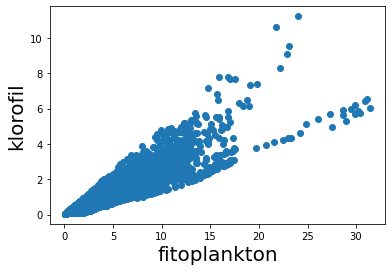

In [11]:
plt.scatter(x1,y)
plt.xlabel('fitoplankton',fontsize=20)
plt.ylabel('klorofil',fontsize=20)
plt.show()


In [9]:
x = sm.add_constant(x1)

In [10]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           chl [mg m-3]   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                 8.061e+05
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:38:12   Log-Likelihood:             2.6357e+05
No. Observations:              579216   AIC:                        -5.271e+05
Df Residuals:                  579214   BIC:                        -5.271e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0811      0.000   -191.000      0.000      -0.082      -0.080
phyc [mmol m-3]     0.2255      0.000    897.857      0.000       0.225       0.226
==============================================================================
Omnibus:                   354918.888   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15998804.264
Skew:                           2.319   Prob(JB):                         0.00
Kurtosis:                      28.326   Cond. No.                         4.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

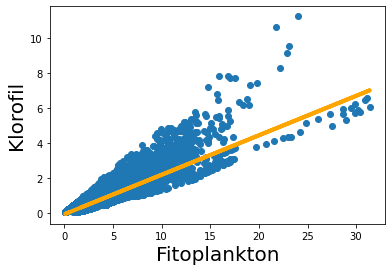

In [12]:
plt.scatter(x1,y)
yhat = 0.2255*x1 + -0.0811
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('Fitoplankton', fontsize= 20)
plt.ylabel('Klorofil', fontsize = 20)
plt.show()